# 01 - Data Preparation

> Scaffold notebook — fill with data and code.

## Setup

In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np
import json

# yeni path
DATA_DIR = Path("../data/open-data/data/events")

# alt klasörlerdeki tüm json dosyalarını bulalım
event_files = list(DATA_DIR.rglob("*.json"))

events = []
for f in event_files:
    with open(f, "r", encoding="utf-8") as file:
        events.extend(json.load(file))

# print(f"Total event files found: {len(events)}")


## Load data

In [2]:
sample_file = event_files[0]
with open(sample_file, "r", encoding="utf-8") as f:
    data = json.load(f)

print(f"Loaded {len(data)} events from:", sample_file)


Loaded 3762 events from: ..\data\open-data\data\events\15946.json


## Clean & normalize

In [3]:
df = pd.json_normalize(data, sep="_")
df.head(3)


,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,...,shot_one_on_one,foul_committed_advantage,foul_won_advantage,clearance_aerial_won,pass_deflected,pass_no_touch,foul_committed_type_id,foul_committed_type_name,pass_straight,pass_goal_assist
0,9f6e2ecf-6685-45df-a62e-c2db3090f6c1,1,1,00:00:00.000,0,0,1,0.0,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0300039d-150d-41e4-b29a-76602ef002e6,2,1,00:00:00.000,0,0,1,0.0,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,491e8901-7630-4cc8-b57b-937dddff2eaa,3,1,00:00:00.000,0,0,1,0.0,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
shots = df[df["type_name"] == "Shot"].copy()
print(f"Total shots: {len(shots)}")
shots.head(3)


Total shots: 28


,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,...,shot_one_on_one,foul_committed_advantage,foul_won_advantage,clearance_aerial_won,pass_deflected,pass_no_touch,foul_committed_type_id,foul_committed_type_name,pass_straight,pass_goal_assist
136,becd7956-ce44-479e-8fc9-16a2d1f1f349,137,1,00:02:29.477,2,29,6,1.075902,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,9107d374-2942-4876-a14f-1b9f86901c15,262,1,00:05:39.641,5,39,12,0.807592,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
714,ddd194ca-08fb-43d0-87c2-33647f975f9f,715,1,00:15:29.059,15,29,23,0.979318,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# JSON verisini normalize ettikten sonra:
df = pd.json_normalize(data, sep="_")

# Tüm kolon isimlerini listele
for i, col in enumerate(df.columns):
    print(f"{i+1:02d}. {col}")


01. id
02. index
03. period
04. timestamp
05. minute
06. second
07. possession
08. duration
09. type_id
10. type_name
11. possession_team_id
12. possession_team_name
13. play_pattern_id
14. play_pattern_name
15. team_id
16. team_name
17. tactics_formation
18. tactics_lineup
19. related_events
20. location
21. player_id
22. player_name
23. position_id
24. position_name
25. pass_recipient_id
26. pass_recipient_name
27. pass_length
28. pass_angle
29. pass_height_id
30. pass_height_name
31. pass_end_location
32. pass_body_part_id
33. pass_body_part_name
34. pass_type_id
35. pass_type_name
36. carry_end_location
37. pass_switch
38. pass_outcome_id
39. pass_outcome_name
40. ball_receipt_outcome_id
41. ball_receipt_outcome_name
42. under_pressure
43. duel_type_id
44. duel_type_name
45. pass_aerial_won
46. counterpress
47. interception_outcome_id
48. interception_outcome_name
49. off_camera
50. ball_recovery_recovery_failure
51. pass_assisted_shot_id
52. pass_shot_assist
53. shot_statsbomb_xg


In [8]:
cols = [
    "team_name",
    "player_name",
    "under_pressure",
    "shot_body_part_name",
    "shot_outcome_name",
    "shot_statsbomb_xg",
    "location",
]
shots = shots[cols].copy()
shots


,team_name,player_name,under_pressure,shot_body_part_name,shot_outcome_name,shot_statsbomb_xg,location
136,Barcelona,Lionel Andrés Messi Cuccittini,NaN,Right Foot,Off T,0.076992,"[111.5, 52.9]"
261,Barcelona,Jordi Alba Ramos,NaN,Left Foot,Off T,0.051668,"[113.9, 26.4]"
714,Barcelona,Lionel Andrés Messi Cuccittini,NaN,Left Foot,Saved,0.016932,"[93.7, 34.7]"
742,Deportivo Alavés,Rubén Sobrino Pozuelo,True,Head,Off T,0.122604,"[109.2, 39.1]"
801,Barcelona,Luis Alberto Suárez Díaz,NaN,Right Foot,Off T,0.041751,"[107.8, 24.7]"
1340,Barcelona,Ousmane Dembélé,NaN,Left Foot,Wayward,0.076063,"[108.6, 27.8]"
1546,Barcelona,Ivan Rakitić,NaN,Head,Off T,0.112513,"[112.5, 41.7]"
1587,Barcelona,Lionel Andrés Messi Cuccittini,NaN,Left Foot,Post,0.049074,"[96.5, 52.6]"
1591,Barcelona,Gerard Piqué Bernabéu,True,Head,Off T,0.115620,"[112.4, 41.0]"
1619,Barcelona,Ousmane Dembélé,NaN,Right Foot,Saved,0.123355,"[102.5, 30.1]"


In [9]:
shots["x"] = shots["location"].apply(lambda v: v[0] if isinstance(v, list) else np.nan)
shots["y"] = shots["location"].apply(lambda v: v[1] if isinstance(v, list) else np.nan)


In [10]:
processed_dir = Path("../data/processed")
processed_dir.mkdir(parents=True, exist_ok=True)
shots.to_csv(processed_dir / "shots.csv", index=False)
print("Saved:", processed_dir / "shots.csv")


Saved: ..\data\processed\shots.csv


## Quick visualization

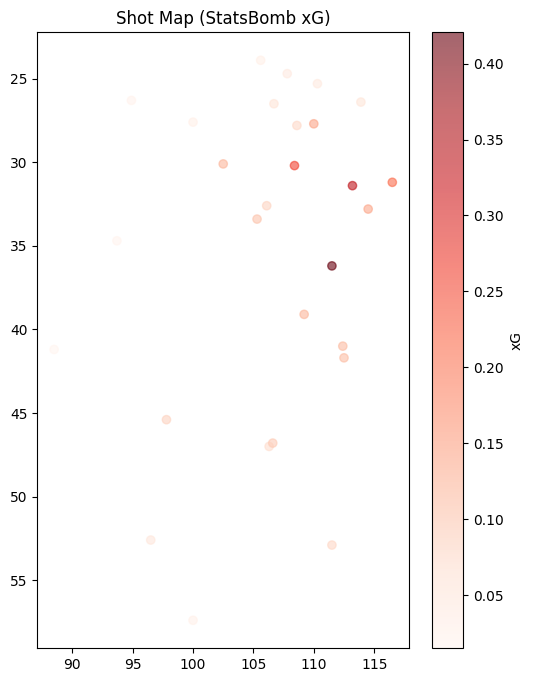

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,8))
plt.scatter(shots["x"], shots["y"], c=shots["shot_statsbomb_xg"], cmap="Reds", alpha=0.6)
plt.gca().invert_yaxis()
plt.title("Shot Map (StatsBomb xG)")
plt.colorbar(label="xG")
plt.show()
